# **Deep Learning Project: Street View Housing Number Digit Recognition**

# **Marks: 60**

--------------
## **Context**
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents.

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance.

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the necessary libraries**

In [2]:
!pip install tensorflow

In [3]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization

from tensorflow.keras.losses import categorical_crossentropy

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.utils import to_categorical

**Let us check the version of tensorflow.**

In [4]:
print(tf.__version__)

2.18.0


## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [5]:
import h5py

# Open the file as read only
# User can make changes in the path as required

h5f = h5py.File('/content/drive/MyDrive/Python Course/Elective Project/SVHN_single_grey1.h5', 'r')

# Load the training and the test dataset

X_train = h5f['X_train'][:]

y_train = h5f['y_train'][:]

X_test = h5f['X_test'][:]

y_test = h5f['y_test'][:]


# Close this file

h5f.close()

Check the number of images in the training and the testing dataset.

In [54]:
X_train.shape, X_test.shape

((42000, 32, 32, 1), (18000, 32, 32, 1))

**Observation:** There are 42,000 32x32 images in the training dataset
There are 18,000 32x32 images in the test dataset

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

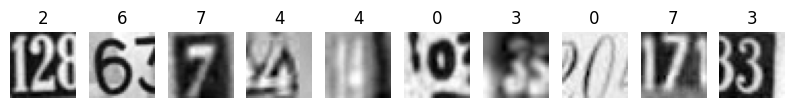

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [7]:
plt.figure(figsize=(10, 1))

for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.imshow(X_train[i], cmap='gray')
  plt.title(y_train[i])
  plt.axis('off')

plt.show()

print('label for each of the above image: %s' % (y_train[0:10]))

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [8]:
# Shape and the array of pixels for the first image

print("Shape:", X_train[0].shape)

print("First image:\n", X_train[0])

Shape: (32, 32)
First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [9]:
# Reshaping the dataset to flatten them. We are reshaping the 2D image into 1D array

X_train = X_train.reshape(X_train.shape[0], 1024)

X_test = X_test.reshape(X_test.shape[0], 1024)

### **Normalize the train and the test data**

In [10]:
# Normalize the train and test data

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

Print the shapes of Training and Test data

In [11]:
# New shape

print('Training set:', X_train.shape, y_train.shape)

print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 1024) (42000,)
Test set: (18000, 1024) (18000,)


### **One-hot encode output**

In [12]:
# One-hot encode output

y_train = to_categorical(y_train)

y_test = to_categorical(y_test)



# Test labels
y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]])

**Observation:**

Each entry of the target variable is a one-hot encoded vector instead of a single label.




## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

### Fix the seed for random number generators

In [13]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train an ANN model as per the above mentioned architecture.**

In [14]:
def build_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(1024,)),  # First hidden layer
        Dense(32, activation='relu'),  # Second hidden layer
        Dense(10, activation='softmax')  # Output layer
    ])

    # Compile the model
    model.compile(
        loss='categorical_crossentropy',
        optimizer=Adam(learning_rate=0.001),
        metrics=['accuracy']
    )

    return model

In [15]:
# Build the model
model = build_model() # Call the correct function name

# Print the model summary
model.summary()


# Fit the model
history_1 = model.fit(X_train, y_train, validation_split=0.2, batch_size=128, epochs=20, verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 68,010 (265.66 KB)

 Trainable params: 68,010 (265.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1088 - loss: 2.3082 - val_accuracy: 0.1744 - val_loss: 2.2324
Epoch 2/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2135 - loss: 2.1556 - val_accuracy: 0.3065 - val_loss: 1.9384
Epoch 3/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3158 - loss: 1.9163 - val_accuracy: 0.3844 - val_loss: 1.7683
Epoch 4/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4275 - loss: 1.6879 - val_accuracy: 0.5104 - val_loss: 1.4989
Epoch 5/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5228 - loss: 1.4552 - val_accuracy: 0.5558 - val_loss: 1.3696
Epoch 6/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5636 - loss: 1.3518 - val_accuracy: 0.5798 - val_loss: 1.3064
Epoch 7/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5877 - loss: 1.2884 - val_accuracy: 0.6018 - val_loss: 1.2553
Epoch 8/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6060 - loss: 1.2421 - val_accuracy: 0.

### **Plot the Training and Validation Accuracies and write down your Observations.**

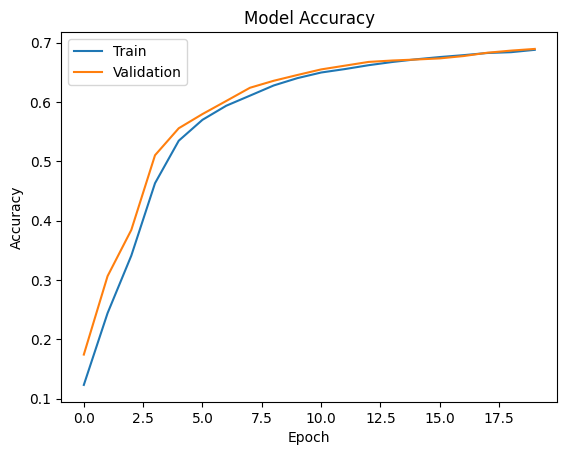

In [16]:
# Plotting the accuracies

plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:**
This accuracy plot shows a well-trained model with good generalization and no signs of overfitting. However, accuracy might be capped at 70%.
More complex models with addtional nodes, layers, parameters, and epochs may improve performance.

Let's build one more model with higher complexity and see if we can improve the performance of the model.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [17]:
# Clearing the backend
from tensorflow.keras import backend

backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture**

In [18]:
def nn_model_2(input_shape=(1024,), num_classes=10):
    model = Sequential()

    # First hidden layer
    model.add(Dense(256, activation='relu', input_shape=input_shape))

    # Second hidden layer
    model.add(Dense(128, activation='relu'))

    # Dropout layer
    model.add(Dropout(0.2))

    # Third hidden layer
    model.add(Dense(64, activation='relu'))

    # Fourth hidden layer
    model.add(Dense(64, activation='relu'))

    # Fifth hidden layer
    model.add(Dense(32, activation='relu'))

    # BatchNormalization layer
    model.add(BatchNormalization())

    # Output layer
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(
        loss='categorical_crossentropy',
        optimizer=Adam(learning_rate=0.0005),
        metrics=['accuracy']
    )

    return model

# Call the function to create the model
model_2 = nn_model_2()

# Print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 204,032 (797.00 KB)

 Trainable params: 68,010 (265.66 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 136,022 (531.34 KB)

In [19]:
history_2 = model_2.fit(X_train, y_train, validation_split=0.2, batch_size=128, epochs=30, verbose=1)


Epoch 1/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.1011 - loss: 2.4744 - val_accuracy: 0.0981 - val_loss: 2.3171
Epoch 2/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.1209 - loss: 2.2923 - val_accuracy: 0.2314 - val_loss: 2.1498
Epoch 3/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2900 - loss: 1.9583 - val_accuracy: 0.4954 - val_loss: 1.5786
Epoch 4/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4982 - loss: 1.4944 - val_accuracy: 0.5174 - val_loss: 1.4059
Epoch 5/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5747 - loss: 1.2996 - val_accuracy: 0.6058 - val_loss: 1.2197
Epoch 6/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6172 - loss: 1.1852 - val_accuracy: 0.6570 - val_loss: 1.0972
Epoch 7/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6484 - loss: 1.1048 - val_accuracy: 0.6785 - val_loss: 1.0210
Epoch 8/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6704 - loss: 1.0374 - val_accuracy: 0.

### **Plot the Training and Validation Accuracies and write down your Observations.**

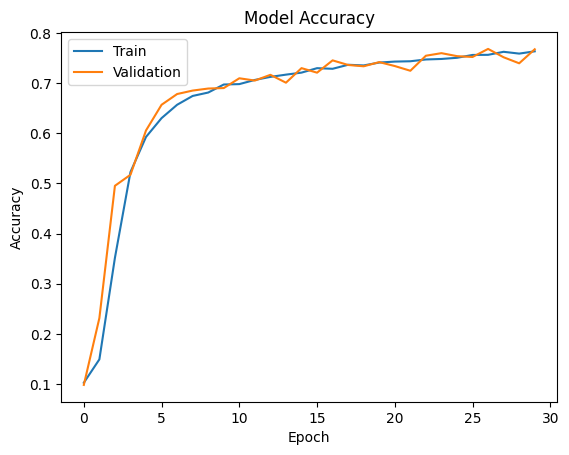

In [20]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:**
Test accuracy consistently improves along with the Training Accuracy, thus overfitting is not an issue and indicates that model improvements may be possible with further refinements.

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

In [21]:
test_pred = model_2.predict(X_test)

test_pred = np.argmax(test_pred, axis = -1)

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [22]:
# Converting each entry to single label from one-hot encoded vector

y_test_labels = np.argmax(y_test, axis = -1)

### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

              precision    recall  f1-score   support

           0       0.82      0.79      0.80      1814
           1       0.72      0.84      0.77      1828
           2       0.80      0.78      0.79      1803
           3       0.69      0.76      0.72      1719
           4       0.86      0.79      0.83      1812
           5       0.71      0.77      0.74      1768
           6       0.83      0.71      0.76      1832
           7       0.85      0.77      0.81      1808
           8       0.67      0.76      0.71      1812
           9       0.78      0.72      0.75      1804

    accuracy                           0.77     18000
   macro avg       0.77      0.77      0.77     18000
weighted avg       0.77      0.77      0.77     18000



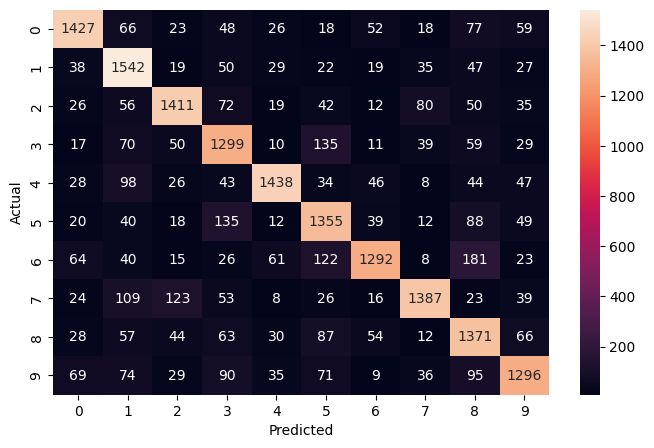

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test_labels, test_pred)) # Classification report for true and predicated values

cm = confusion_matrix(y_test_labels, test_pred) # Confusion matrix for true and predicted values

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f')

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

**Final Observations:**



The model achieved 77% accuracy across all 18,000 test samples.
This suggests a fairly well-performing model, though there is room for improvement. Overall, precision-recall balance has improved slightly. Further refinements in data handling and model tuning could help push performance higher.






## **Using Convolutional Neural Networks**

### **Load the dataset again and split the data into the train and the test dataset.**

In [24]:
import h5py

# Open the file as read only
# User can make changes in the path as required
h5f = h5py.File('/content/drive/MyDrive/Python Course/Elective Project/SVHN_single_grey1.h5', 'r')

X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]

# Keep the file open until you finish using it
#h5f.close() # Remove this line or move to the end after usage

# Close this file

h5f.close()

Check the number of images in the training and the testing dataset.

In [25]:
len(X_train), len(X_test)

(42000, 18000)

**Observation:**

There are 42,000 images in the training data and 18,000 images in the testing data.


## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [26]:
# Shape and the array of pixels for the first image

print("Shape:", X_train[0].shape)

print()

print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

In [27]:
# Reshaping the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs
X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)

X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)

Normalize inputs from 0-255 to 0-1

In [28]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

Print New shape of Training and Test

In [29]:
print('Training set:', X_train.shape, y_train.shape)

print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 32, 32, 1) (42000,)
Test set: (18000, 32, 32, 1) (18000,)


### **One-hot encode the labels in the target variable y_train and y_test.**

In [30]:
y_train = to_categorical(y_train)

y_test = to_categorical(y_test)

# test labels
y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]])

**Observation:**

Each target variable is a one-hot encoded vector instead of single digit label.

## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators

In [31]:
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

In [32]:
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization, Conv2D, LeakyReLU, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam # Import Adam from Keras optimizers
# First CNN Model Defintion
def cnn_model_1():

    # Intializing a sequential model
    model = Sequential()

    # First convolutional layer with 16 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
    model.add(Conv2D(16, (3, 3), padding="same", input_shape=(32, 32, 1), kernel_regularizer=tf.keras.regularizers.l2(0.01))) # Added tf.keras.regularizers

    # Adding LeakyReLU layer to the model
    model.add(LeakyReLU(0.1))

    # Second convolutional layer with 32 filters and kernel size 3x3 , 'same' padding
    model.add(Conv2D(32, (3, 3), padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.01))) # Added tf.keras.regularizers

    # Adding another LeakyReLU layer to the model
    model.add(LeakyReLU(0.1))

    # Adding max pooling to reduce the size of output of conv layer
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flattening the output of the convolutional layer after max pooling to make it ready for creating dense connections
    model.add(Flatten())

    # Adding a fully connected dense layer with 32 neurons
    model.add(Dense(32))

    # Adding another LeakyReLU layer to the model
    model.add(LeakyReLU(0.1))

    # Adding the output layer with 10 neurons and activation function as softmax since this is a multi-class classification problem
    model.add(Dense(10, activation='softmax'))

    # Using Adam Optimizer
    #opt = tf.compat.v1.train.AdamOptimizer(learning_rate=0.001) # Remove this line
    opt = Adam(learning_rate=0.001) # Use Keras Adam optimizer

    # Compile model
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

#Call the function and assign the returned model to a variable
cnn_model_1 = cnn_model_1()

# Print the model summary
cnn_model_1.summary()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │         262,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 267,306 (1.02 MB)

 Trainable params: 267,306 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
cnn_history_1 = cnn_model_1.fit(X_train, y_train, validation_split=0.2, batch_size=32, epochs=20, verbose=1)

Epoch 1/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 35ms/step - accuracy: 0.3929 - loss: 1.8024 - val_accuracy: 0.7913 - val_loss: 0.8100
Epoch 2/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 43s 37ms/step - accuracy: 0.8140 - loss: 0.7359 - val_accuracy: 0.8170 - val_loss: 0.7053
Epoch 3/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 35ms/step - accuracy: 0.8425 - loss: 0.6286 - val_accuracy: 0.8348 - val_loss: 0.6525
Epoch 4/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 35ms/step - accuracy: 0.8577 - loss: 0.5710 - val_accuracy: 0.8429 - val_loss: 0.6203
Epoch 5/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 35ms/step - accuracy: 0.8701 - loss: 0.5287 - val_accuracy: 0.8493 - val_loss: 0.6056
Epoch 6/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 35ms/step - accuracy: 0.8798 - loss: 0.4976 - val_accuracy: 0.8536 - val_loss: 0.5944
Epoch 7/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 35ms/step - accuracy: 0.8866 - loss: 0.4699 - val_accuracy: 0.8576 - val_loss: 0.5814
Epoch 8/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 35ms/step - accuracy: 0.8906 -

### **Plot the Training and Validation Accuracies and Write your observations.**

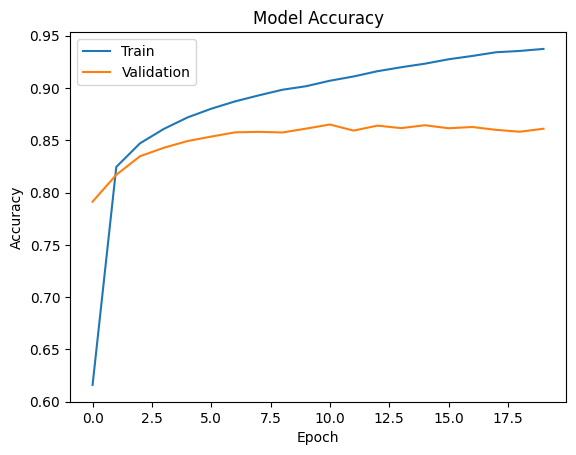

In [34]:
plt.plot(cnn_history_1.history['accuracy'])
plt.plot(cnn_history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:**

The model has 267,306 trainable parameters
The training accuracy is ~94% and the validation accuracy is ~85%.
There is a noticeable gap between training and validation accuracy, indicating potential overfitting.


Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [74]:
# Clearing backend

from tensorflow.keras import backend

backend.clear_session()

In [75]:
# Fixing the seed for random number generators

np.random.seed(45)

import random

random.seed(45)

tf.random.set_seed(45)

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

In [76]:
def cnn_model_2():

    # Intializing a sequential model
    model = Sequential()

    # First convolutional layer with 16 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size

    model.add(Conv2D(16, (3, 3), padding="same", input_shape=(32, 32, 1)))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model
    model.add(BatchNormalization())
    # Second convolutional layer with 32 filters and kernel size 3x3 , 'same' padding
    model.add(Conv2D(32, (3, 3), padding="same"))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    # Third convolutional layer with 32 filters and kernel size 3x3 , 'same' padding
    model.add(Conv2D(32, (3, 3), padding="same"))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    # Fourth convolutional layer with
    model.add(Conv2D(64, (3, 3), padding="same"))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    # Flattening the output of the convolutional layer after max pooling to make it ready for creating dense connections
    model.add(Flatten())
    # Adding a fully connected dense layer with 32 neurons
    model.add(Dense(32))
    model.add(LeakyReLU(0.1))
    model.add(Dropout(0.5))
    # Adding the output layer with 10 neurons and activation function as softmax since this is a multi-class classification problem
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Call the function and assign the returned model to a variable called 'model_cnn_2'
model_cnn_2 = cnn_model_2()

# Print the model summary using the variable 'model_cnn_2'
model_cnn_2.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 16, 16, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 8, 8, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 4, 4, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 2, 2, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 41,674 (162.79 KB)

 Trainable params: 41,386 (161.66 KB)

 Non-trainable params: 288 (1.12 KB)

In [77]:
history_2 = model_cnn_2.fit(X_train, y_train, validation_split=0.2, batch_size=128, epochs=30, verbose=1)

Epoch 1/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 26s 86ms/step - accuracy: 0.2370 - loss: 2.1548 - val_accuracy: 0.2024 - val_loss: 2.2048
Epoch 2/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 22s 83ms/step - accuracy: 0.6899 - loss: 0.9560 - val_accuracy: 0.6896 - val_loss: 0.9356
Epoch 3/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 43s 90ms/step - accuracy: 0.7795 - loss: 0.7053 - val_accuracy: 0.8530 - val_loss: 0.4866
Epoch 4/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 40s 87ms/step - accuracy: 0.8142 - loss: 0.5989 - val_accuracy: 0.8437 - val_loss: 0.5156
Epoch 5/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 22s 83ms/step - accuracy: 0.8406 - loss: 0.5273 - val_accuracy: 0.8771 - val_loss: 0.4244
Epoch 6/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 43s 90ms/step - accuracy: 0.8542 - loss: 0.4772 - val_accuracy: 0.8708 - val_loss: 0.4341
Epoch 7/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 40s 87ms/step - accuracy: 0.8668 - loss: 0.4371 - val_accuracy: 0.8718 - val_loss: 0.4368
Epoch 8/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 41s 86ms/step - accuracy: 0.8758 - loss: 0.4103 - 

### **Plot the Training and Validation accuracies and write your observations.**

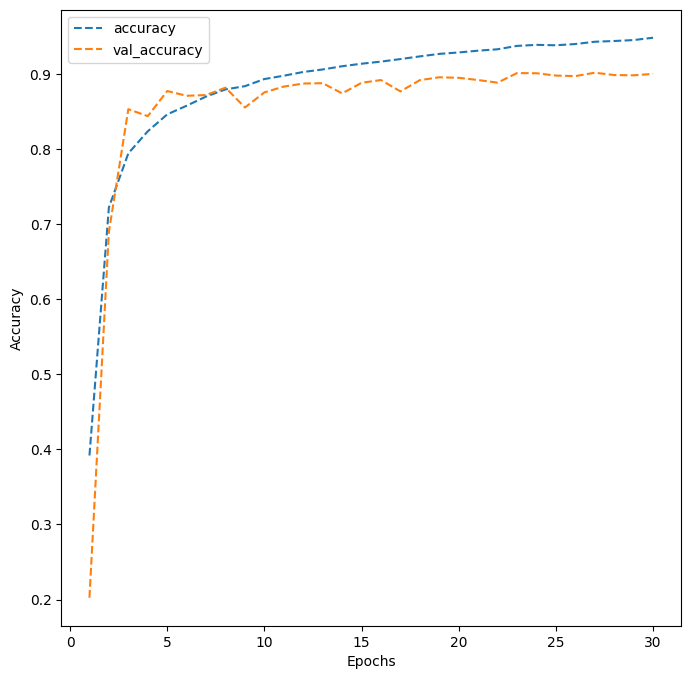

In [78]:
dict_history = history_2.history # Assign history to dict_history

list_ep = [i for i in range(1, 31)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_history['accuracy'], ls = '--', label = 'accuracy') # Access it using dict_history

plt.plot(list_ep, dict_history['val_accuracy'], ls = '--', label = 'val_accuracy') # Access it using dict_history


plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

**Observations:**

Both training and validation accuracy increase as epochs progress, indicating the model is learning effectively.This could indicate that some form of regularization (e.g., dropout) is helping generalization or that the validation set is easier than the training set.Around epoch 20, accuracy gains slow down, suggesting the model is nearing convergence.The validation accuracy does not show a significant drop, meaning overfitting is not a major concern.

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.**

In [80]:
test_pred = model_cnn_2.predict(X_test)

test_pred = np.argmax(test_pred, axis = -1)

563/563 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [81]:
y_test_labels = np.argmax(y_test, axis = -1)  # Converting each entry to single label from one-hot encoded vector

### **Write your final observations on the performance of the model on the test data.**

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      1814
           1       0.90      0.90      0.90      1828
           2       0.92      0.92      0.92      1803
           3       0.90      0.84      0.87      1719
           4       0.94      0.91      0.92      1812
           5       0.86      0.93      0.89      1768
           6       0.87      0.89      0.88      1832
           7       0.91      0.93      0.92      1808
           8       0.91      0.85      0.88      1812
           9       0.91      0.88      0.89      1804

    accuracy                           0.90     18000
   macro avg       0.90      0.90      0.90     18000
weighted avg       0.90      0.90      0.90     18000



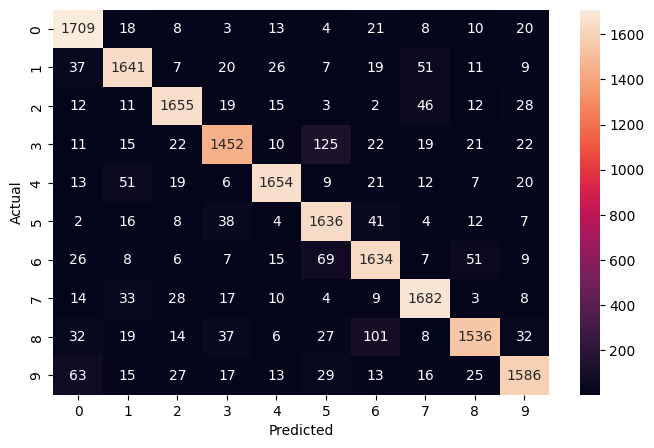

In [82]:
# Importing required functions

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

# Printing the classification report

print(classification_report(y_test_labels, test_pred)) # Use y_test_labels which converted to single label from one-hot encoded vector instead of y_test

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_test_labels, test_pred) # Use y_test_labels which converted to single label from one-hot encoded vector instead of y_test

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f')

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

**Final Observations:**

The model performs very well across all 10 classes (0-9). All classes have precision, recall, and F1-scores in the 86-94% range.There's no single class where the model drastically underperforms compared to others. This indicates a good balance in the model's ability to classify different categories.The overall accuracy of 90% is excellent.

### Conclusion

1. I trained 4 different models with them getting more and more complicated.
2. First ANN model is doing well on not overfitting and has an accuracy of 70% on the training data and 72% on the valdation data.
3. The second ANN model which have more hidden layers along with Batch Normalization and Dropout layers. It also does not seem to overfit and has an accuracy of 77% on the training data and 78% on the validation data.
4. The next model is the first CNN model which has a clear issue of overfitting. But also has higher accuracies with 94% on the training data and 85% on the validation data.
5. The last model is a more complicated CNN model with more hidden, LeakyReLU, and Dropout layers. It is doing a lot better on generalizing and not overfitting. It has accuracy of 92% on the training data and 89% on the validation data.
6. The last CNN model, model_cnn_2, is the model I recommend using because of its high accuracy on the training and validation data and its greater ability to generalize. Which means it will perform well on unseen data.